In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv('data/train.csv')
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [25]:
species = set(df.species)

In [26]:
map_num = np.arange(len(species))

In [27]:
print(len(species))
print(len(map_num))

99
99


In [31]:
# mapping用の辞書を作る。
species_mapping = {species:map_num for (species,map_num) in zip(species,map_num) }

In [32]:
species_mapping

{'Acer_Capillipes': 93,
 'Acer_Circinatum': 64,
 'Acer_Mono': 98,
 'Acer_Opalus': 7,
 'Acer_Palmatum': 63,
 'Acer_Pictum': 32,
 'Acer_Platanoids': 48,
 'Acer_Rubrum': 34,
 'Acer_Rufinerve': 29,
 'Acer_Saccharinum': 33,
 'Alnus_Cordata': 2,
 'Alnus_Maximowiczii': 4,
 'Alnus_Rubra': 88,
 'Alnus_Sieboldiana': 57,
 'Alnus_Viridis': 8,
 'Arundinaria_Simonii': 52,
 'Betula_Austrosinensis': 0,
 'Betula_Pendula': 27,
 'Callicarpa_Bodinieri': 65,
 'Castanea_Sativa': 16,
 'Celtis_Koraiensis': 76,
 'Cercis_Siliquastrum': 92,
 'Cornus_Chinensis': 71,
 'Cornus_Controversa': 43,
 'Cornus_Macrophylla': 31,
 'Cotinus_Coggygria': 73,
 'Crataegus_Monogyna': 42,
 'Cytisus_Battandieri': 1,
 'Eucalyptus_Glaucescens': 9,
 'Eucalyptus_Neglecta': 58,
 'Eucalyptus_Urnigera': 25,
 'Fagus_Sylvatica': 59,
 'Ginkgo_Biloba': 11,
 'Ilex_Aquifolium': 74,
 'Ilex_Cornuta': 44,
 'Liquidambar_Styraciflua': 87,
 'Liriodendron_Tulipifera': 69,
 'Lithocarpus_Cleistocarpus': 54,
 'Lithocarpus_Edulis': 56,
 'Magnolia_Heptapet

In [23]:
species_mapping = {'Acer_Opalus	':0,'Pterocarya_Stenoptera':1,'Quercus_Hartwissiana':2,
                   'Tilia_Tomentosa':3,'Quercus_Variabilis':4,}

SyntaxError: invalid syntax (<ipython-input-23-0e6306e3d734>, line 1)

In [22]:
df[df.species == 'Quercus_Variabilis']

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.000000,...,0.096680,0.0,0.021484,0.000000,0.000000,0.0,0.0,0.0,0.0,0.031250
21,32,Quercus_Variabilis,0.019531,0.029297,0.080078,0.033203,0.025391,0.023438,0.009766,0.005859,...,0.021484,0.0,0.057617,0.000000,0.002930,0.0,0.0,0.0,0.0,0.035156
40,64,Quercus_Variabilis,0.011719,0.023438,0.091797,0.023438,0.013672,0.027344,0.003906,0.000000,...,0.074219,0.0,0.041016,0.000000,0.000000,0.0,0.0,0.0,0.0,0.015625
69,120,Quercus_Variabilis,0.007812,0.011719,0.068359,0.003906,0.015625,0.011719,0.003906,0.000000,...,0.077148,0.0,0.048828,0.000000,0.000000,0.0,0.0,0.0,0.0,0.004883
106,190,Quercus_Variabilis,0.011719,0.017578,0.115230,0.019531,0.015625,0.013672,0.017578,0.003906,...,0.042969,0.0,0.055664,0.000000,0.009766,0.0,0.0,0.0,0.0,0.024414
159,278,Quercus_Variabilis,0.007812,0.013672,0.076172,0.003906,0.019531,0.009766,0.005859,0.000000,...,0.072266,0.0,0.006836,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001953
188,327,Quercus_Variabilis,0.009766,0.015625,0.123050,0.015625,0.017578,0.011719,0.005859,0.000000,...,0.058594,0.0,0.007812,0.000000,0.000000,0.0,0.0,0.0,0.0,0.004883
421,692,Quercus_Variabilis,0.009766,0.017578,0.060547,0.013672,0.009766,0.011719,0.017578,0.000000,...,0.026367,0.0,0.034180,0.000000,0.000000,0.0,0.0,0.0,0.0,0.039062
540,866,Quercus_Variabilis,0.007812,0.015625,0.113280,0.025391,0.015625,0.007812,0.009766,0.005859,...,0.040039,0.0,0.044922,0.000977,0.006836,0.0,0.0,0.0,0.0,0.015625
606,961,Quercus_Variabilis,0.007812,0.013672,0.103520,0.011719,0.011719,0.007812,0.009766,0.001953,...,0.039062,0.0,0.017578,0.000000,0.001953,0.0,0.0,0.0,0.0,0.039062


In [3]:
import cv2

In [6]:
import os
# os.listdir('./data/images/')

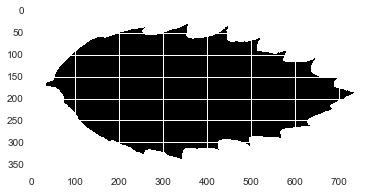

In [14]:
from PIL import Image
im = Image.open('./data/images/7.jpg')
plt.imshow(im)
plt.show()